In [9]:
# from data_download import *
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option('display.max_columns', None)

In [16]:
# salespath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_RPSale.csv'
# parcelpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_Parcel.csv'
# residentialpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_ResBldg.csv'
# sales = pd.read_csv(salespath, encoding = 'ISO-8859-1')
#parcels = pd.read_csv(parcelpath, encoding = 'ISO-8859-1')
#residences = pd.read_csv(residentialpath, encoding = 'ISO-8859-1')

sales = pd.read_csv('../data/EXTR_RPSale.csv', encoding = 'ISO-8859-1')
residences = pd.read_csv('../data/EXTR_ResBldg.csv', encoding = 'ISO-8859-1')
parcels = pd.read_csv('../data/EXTR_Parcel.csv', encoding = 'ISO-8859-1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
sales = sales[sales['DocumentDate'].astype(str).str.endswith('2019')]
sales.head()


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,
49,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,,,WAGNERESTATES LLC ...,SCHAFFER CORBIN ...,3,2,3,N,N,N,N,1,3,
98,3000673,894444,200,06/26/2019,185000,20190722001395,,,,,,,MAY THOMAS A+SHIRLEY E ...,KOCHEL RICHARD J+JANICE M ...,3,2,3,N,N,N,N,1,3,
210,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,
420,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,


In [17]:
combo = sales.merge(residences, on = ['Major','Minor'])
combo = combo.merge(parcels, on = ['Major','Minor'])
combo.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,,,WENKLE NOEL SMITH -TRUSTEE ...,ALEXANDER APRIL ...,3,6,3,N,N,N,N,1,8,,1,1,806 23RD ST SE 98002,806,,,23RD,ST,SE,98002,1.0,7,0,1490,0,0,0,0,0,1490,0,0,0,0,500,N,0,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,CARMEN'S 1ST ADD,11,,5,21,19,SE,R,28.0,8.0,NaN,NaN,AUBURN,133,R7,1,1,2,7929,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,1066933,138860,110,06/12/1989,109300,198906191556,144,021,138860,P,11,,M C NORTHWEST CORP ...,WENKEL SARA J+WENKLE CHRISTOPH ...,2,0,2,N,N,N,N,1,8,,1,1,806 23RD ST SE 98002,806,,,23RD,ST,SE,98002,1.0,7,0,1490,0,0,0,0,0,1490,0,0,0,0,500,N,0,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,CARMEN'S 1ST ADD,11,,5,21,19,SE,R,28.0,8.0,NaN,NaN,AUBURN,133,R7,1,1,2,7929,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,2102034,138860,110,01/16/2005,14684,20050216001248,,,,,,,WENKLE CHRISTOPHER ...,KAPLAN SARA WENKLE ...,2,6,4,N,N,N,N,14,8,51 52,1,1,806 23RD ST SE 98002,806,,,23RD,ST,SE,98002,1.0,7,0,1490,0,0,0,0,0,1490,0,0,0,0,500,N,0,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,CARMEN'S 1ST ADD,11,,5,21,19,SE,R,28.0,8.0,NaN,NaN,AUBURN,133,R7,1,1,2,7929,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,2131568,138860,110,06/08/2005,0,20050617000041,,,,,,,KAPLAN SARA WENKLE ...,KAPLAN SARA WENKLE C/O FRANK NEWELL ATTORNEY ...,0,0,2,N,N,N,N,5,8,31 51,1,1,806 23RD ST SE 98002,806,,,23RD,ST,SE,98002,1.0,7,0,1490,0,0,0,0,0,1490,0,0,0,0,500,N,0,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,CARMEN'S 1ST ADD,11,,5,21,19,SE,R,28.0,8.0,NaN,NaN,AUBURN,133,R7,1,1,2,7929,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,2704079,423943,50,10/11/2014,0,20141205000558,,,,,,,STEPHENS ANTHONY P ...,STEPHENS ANTHONY P ...,3,6,15,N,N,N,N,18,8,18 31 51,1

In [18]:
combo = combo[(combo['SalePrice'] > 120000) & (combo['SalePrice'] < 5000000)]
combo.describe()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Range,Township,Section,Area,SubArea,SpecArea,SpecSubArea,LevyCode,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
count,8.377570e+05,8.377570e+05,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.00000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,8.377570e+05,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,0.0,0.0,837757.000000,837757.000000,837757.000000,837757.000000,8.377570e+05,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.000000,837757.0,837757.000000,837757.000000,837757.000000,837757.000000
mean,2.149307e+06,4.742569e+05,3.587778,5.386410,3.601314,1.829891,7.815654,1.012893,1.017718,1.531865,7.779637,0.007688,1302.117525,45.906586,550.793114,8.751213,0.626041,0.502911,2214.191048,481.406940,307.801983,2.86055,83.504188,292.149560,71.294337,5.299534,136.542586,4.941114,2.071424,3.532555,3.460736,0.521635,0.477346,1.630185,0.648868,0.337246,0.064674,0.173688,1974.293389,97.847328,0.219559,0.086391,0.004833,3.434258,6.972489e+02,4.629819,23.896334,18.434161,48.558023,5.796556,NaN,NaN,1623.731894,1.118341,1.007182,4.057715,1.733366e+04,1.972929,1.861703,3.936677,0.085534,1.016512,0.004038,1.233335,0.005066,0.023497,0.067169,0.067764,0.258324,0.023772,0.066248,0.067151,0.018043,0.025213,0.012414,0.116966,1.644613,0.025277,0.000705,0.006126,0.016371,0.070566,0.201415,0.0,0.006992,0.001098,0.001034,0.006951
std,5.520527e+05,4.691991e+05,3.650357,1.838364,3.478299,3.127301,1.034866,0.199113,0.154772,0.516121,1.205151,0.845163,505.940175,167.804367,667.797770,77.738683,21.704655,16.410930,980.532921,593.929274,464.616308,3.60108,187.026241,300.606958,125.706018,39.235362,217.958206,0.918480,0.538577,16.788546,0.926722,0.537909,0.641450,0.700967,0.645808,0.516973,0.258597,0.398176,29.563383,431.282374,4.008856,1.883792,0.478940,0.655856,3.805114e+03,1.109283,1.631409,10.248249,26.663827,4.046987,NaN,NaN,1874.790317,0.817677,0.105587,13.042256,6.396780e+04,0.163981,0.346454,0.261021,0.279675,0.172915,0.063418,0.971898,0.583831,0.254525,0.424952,0.411053,0.799724,0.255674,0.423085,0.424203,0.230083,0.274966,0.173756,0.907208,20.760343,0.213125,0.026551,0.114298,0.178966,2.838275,0.549209,0.0,0.243560,0.224755,0.055183,0.137151
min,6.63

In [20]:
correlations = combo.corr()['SalePrice']

In [21]:
high_corrs = correlations.sort_values(ascending = False).head(20)
low_corrs = correlations.sort_values(ascending = True).head(20)

In [22]:
high_corrs

SalePrice             1.000000
SqFtTotLiving         0.405170
BldgGrade             0.399546
ExciseTaxNbr          0.340229
SqFt2ndFloor          0.340181
Stories               0.251815
BathFullCount         0.248529
SqFt1stFloor          0.219067
SqFtOpenPorch         0.206572
LakeWashington        0.188897
Bedrooms              0.184818
BathHalfCount         0.183259
YrBuilt               0.181653
Territorial           0.177402
FpSingleStory         0.163325
PrincipalUse          0.163042
SqFtGarageAttached    0.158854
TidelandShoreland     0.149594
Township              0.122856
HeatSystem            0.112696
Name: SalePrice, dtype: float64

In [23]:
low_corrs

Condition          -0.065755
PropertyClass      -0.047248
FpFreestanding     -0.043374
Access             -0.037102
StreetSurface      -0.026916
SubArea            -0.023804
SaleReason         -0.022000
SaleInstrument     -0.020558
TrafficNoise       -0.017733
HBUAsIfVacant      -0.010397
LevyCode           -0.010139
NbrLivingUnits     -0.008952
HeatSource         -0.005419
HBUAsImproved      -0.003739
PcntNetCondition   -0.000580
SqFtUnfinHalf       0.000839
PcntUnusable        0.001038
Obsolescence        0.003575
Contamination       0.003608
WaterSystem         0.004637
Name: SalePrice, dtype: float64

In [62]:
formula = 'SalePrice ~ SqFtTotLiving'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                 1.645e+05
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:55:28   Log-Likelihood:            -1.2054e+07
No. Observations:              837757   AIC:                         2.411e+07
Df Residuals:                  837755   BIC:                         2.411e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.497e+04   1157.437     38.853      0.000    4.27e+04    4.72e+04
SqFtTotLiving   193.8796      0.478    405.634      0.000     192.943     194.816
==============================================================================
Omnibus:                   722604.329   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27386045.563
Skew:                           4.057   Prob(JB):                         0.00
Kurtosis:                      29.809   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

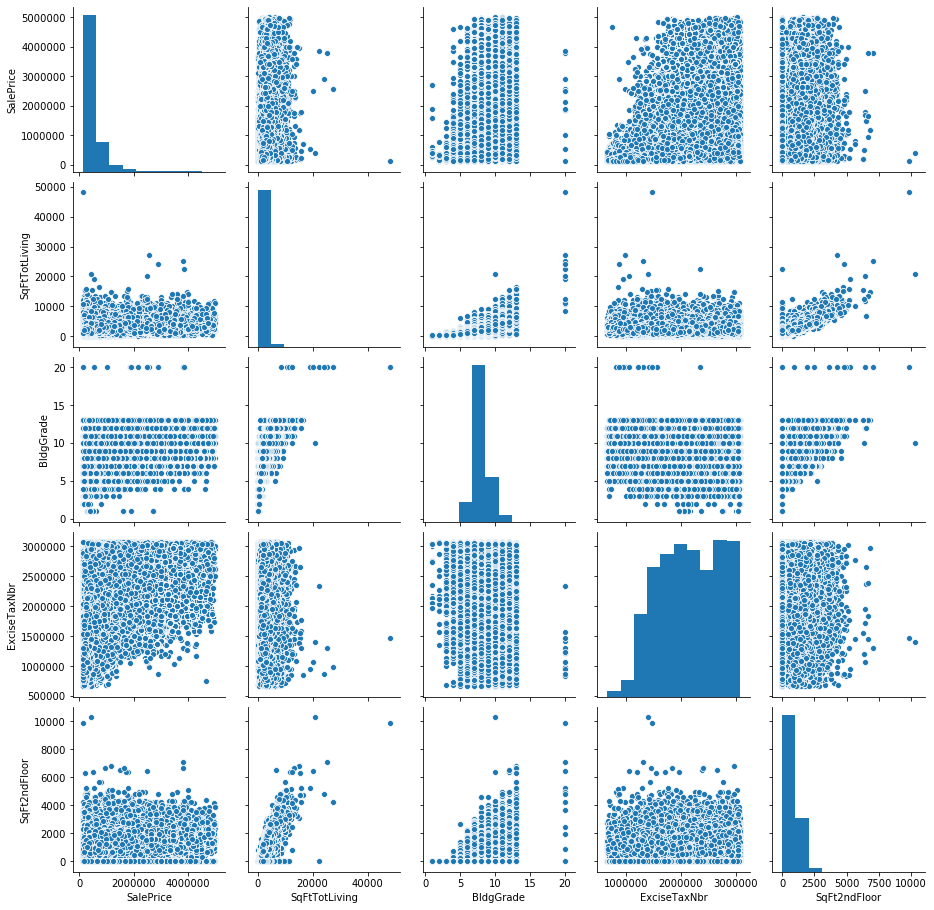

In [91]:
high_corrs_list = ['SalePrice', 'SqFtTotLiving', 'BldgGrade', 'ExciseTaxNbr', 'SqFt2ndFloor']
high_corrsdf = combo[high_corrs_list]
sns.pairplot(high_corrsdf);

In [19]:
residences['ZipCode'].value_counts()

98115         13588
98042         12064
98117         11087
98023         10815
98103         10683
              ...  
98107-5353        1
98075-9517        1
98059-7428        1
98025             1
988122            1
Name: ZipCode, Length: 298, dtype: int64

In [24]:
resi_cols = ['SqFtTotLiving','BldgGrade','SqFtOpenPorch','SqFtEnclosedPorch','Bedrooms','YrBuilt']